Entrada favorável de fármacos. n = 0 < n0


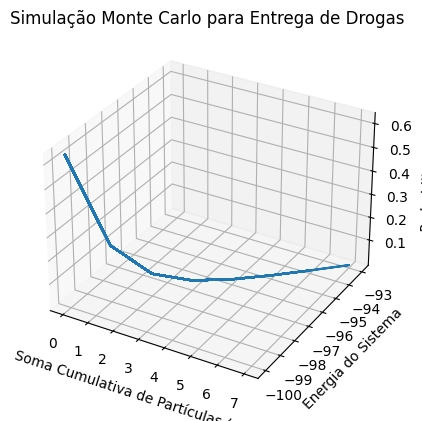

In [1]:
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros do sistema
n0 = 100  # Número máximo de partículas que a célula pode acomodar
e = 1.0  # Energia do sistema
k = 1.0  # Constante de Boltzmann
T = 1.0  # Temperatura

# Função para calcular a energia do sistema
def calcular_energia(n):
    return -e * (n0 - n)

# Função de partição
def calcular_funcao_particao():
    Z = 0
    for n in range(n0 + 1):
        Z += math.exp(-calcular_energia(n) / (k * T))
    return Z

# Probabilidade de encontrar o sistema no estado 'n'
def calcular_probabilidade(n, funcao_particao):
    return math.exp(-calcular_energia(n) / (k * T)) / funcao_particao

# Simulação de Monte Carlo para determinar a entrada favorável ou não favorável
def simulacao_monte_carlo(num_passos):
    n = 0  # Inicialmente, a célula está vazia
    energia_atual = calcular_energia(n)
    historico_n = [n]
    historico_energia = [energia_atual]

    funcao_particao = calcular_funcao_particao()

    for _ in range(num_passos):
        # Gerar uma proposta aleatória para adicionar ou remover uma partícula
        proposta = random.choice([-1, 1])
        nova_n = n + proposta

        # Garantir que n não seja negativo
        nova_n = max(0, nova_n)

        # Calcular a nova energia
        nova_energia = calcular_energia(nova_n)

        # Aceitar a proposta se a nova energia for menor ou com uma certa probabilidade
        if nova_energia < energia_atual or random.random() < math.exp((energia_atual - nova_energia)):
            n = nova_n
            energia_atual = nova_energia

        # Registrar o estado atual
        historico_n.append(n)
        historico_energia.append(energia_atual)

    return historico_n, historico_energia, funcao_particao

# Número de passos da simulação (ajuste conforme necessário)
num_passos = 10000

# Realizar a simulação
n_simulado, energia_simulada, funcao_particao = simulacao_monte_carlo(num_passos)

# Verificar se a entrada de fármacos é favorável ou não favorável
if n_simulado[-1] < n0:
    print(f"Entrada favorável de fármacos. n = {n_simulado[-1]} < n0")
else:
    print(f"Entrada não favorável de fármacos. n = {n_simulado[-1]} > n0")

# Calcular a probabilidade em relação ao estado 'n'
probabilidades = [calcular_probabilidade(n, funcao_particao) for n in n_simulado]

# Gerar o gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(n_simulado, energia_simulada, probabilidades)
ax.set_xlabel('Soma Cumulativa de Partículas (n)')
ax.set_ylabel('Energia do Sistema')
ax.set_zlabel('Probabilidade')
plt.title('Simulação Monte Carlo para Entrega de Drogas')
plt.show()

Entrada favorável de fármacos. n = 0 < n0


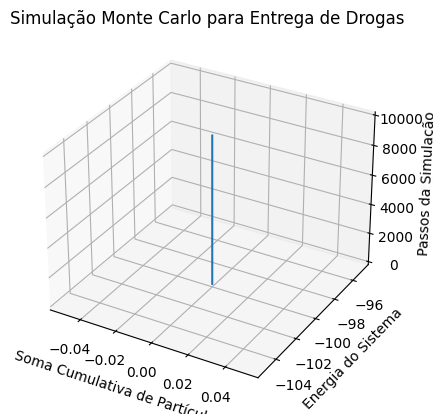

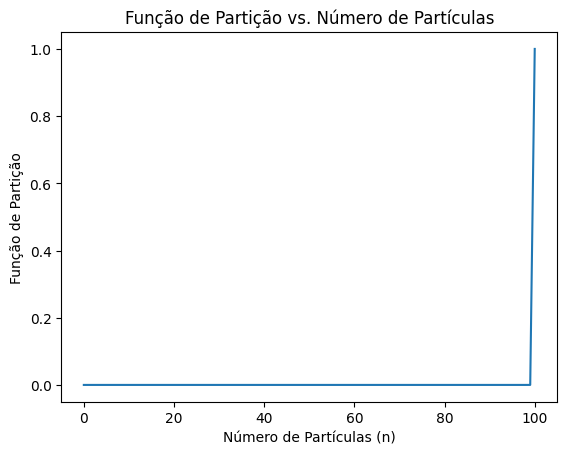

In [3]:
# Parâmetros do sistema
n0 = 100  # Número máximo de partículas que a célula pode acomodar
e = 1.0  # Energia do sistema
temperatura = 0.1  # Temperatura do sistema

# Função de partição
def funcao_particao(n):
    return sum(math.exp(-e * (n0 - i) / temperatura) for i in range(n + 1))

# Simulação de Monte Carlo para determinar a entrada favorável ou não favorável
def simulacao_monte_carlo(num_passos):
    n = 0  # Inicialmente, a célula está vazia
    energia_atual = calcular_energia(n)
    historico_n = [n]
    historico_energia = [energia_atual]

    for _ in range(num_passos):
        # Verificar se a temperatura é alta o suficiente para permitir a entrada de partículas
        if temperatura <= 0:
            break

        # Gerar uma proposta aleatória para adicionar ou remover uma partícula
        proposta = random.choice([-1, 1])
        nova_n = n + proposta

        # Garantir que n não seja negativo
        nova_n = max(0, nova_n)

        # Calcular a nova energia
        nova_energia = calcular_energia(nova_n)

        # Calcular a probabilidade de aceitação
        probabilidade_aceitacao = math.exp((energia_atual - nova_energia) / temperatura)

        # Aceitar a proposta com base na probabilidade de aceitação
        if nova_energia < energia_atual or random.random() < probabilidade_aceitacao:
            n = nova_n
            energia_atual = nova_energia

        # Registrar o estado atual
        historico_n.append(n)
        historico_energia.append(energia_atual)

    return historico_n, historico_energia

# Função para calcular a energia do sistema
def calcular_energia(n):
    return -e * (n0 - n)

# Número de passos da simulação (ajuste conforme necessário)
num_passos = 10000

# Realizar a simulação
n_simulado, energia_simulada = simulacao_monte_carlo(num_passos)

# Verificar se a entrada de fármacos é favorável ou não favorável
if n_simulado[-1] < n0:
    print(f"Entrada favorável de fármacos. n = {n_simulado[-1]} < n0")
else:
    print(f"Entrada não favorável de fármacos. n = {n_simulado[-1]} > n0")

# Calcular a função de partição para diferentes valores de n
valores_n = range(n0 + 1)
particoes = [funcao_particao(n) for n in valores_n]

# Gerar o gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(n_simulado, energia_simulada, range(len(n_simulado)))
ax.set_xlabel('Soma Cumulativa de Partículas (n)')
ax.set_ylabel('Energia do Sistema')
ax.set_zlabel('Passos da Simulação')
plt.title('Simulação Monte Carlo para Entrega de Drogas')
plt.show()

# Gráfico da função de partição
plt.figure()
plt.plot(valores_n, particoes)
plt.xlabel('Número de Partículas (n)')
plt.ylabel('Função de Partição')
plt.title('Função de Partição vs. Número de Partículas')
plt.show()